In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузка данных
train = pd.read_csv(
    'train-001.csv',
    nrows=10**6
)
questions = pd.read_csv('questions.csv')
lectures = pd.read_csv('lectures.csv')

Просмотр данных

In [3]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [4]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [5]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


Информация о DataFrame

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [7]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [8]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Выявление пропущенных значений

In [35]:
print("\nTrain Missing Values:")
print(train.isnull().sum())

print("\nQuestions Missing Values:")
print(questions.isnull().sum())

print("\nLectures Missing Values:")
print(lectures.isnull().sum())


Train Missing Values:
row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       23723
prior_question_had_explanation     3816
dtype: int64

Questions Missing Values:
question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Lectures Missing Values:
lecture_id    0
tag           0
part          0
type_of       0
dtype: int64


In [10]:
train_data = train.copy()
questions_data = questions.copy()
lectures_data = lectures.copy()

Обработка временных данных

In [11]:
# Преобразование в datetime
train_data['datetime'] = pd.to_datetime(
    train_data['timestamp'] / 1000,
    unit = 's', 
    origin = pd.Timestamp('2010-01-01')
)
#Добавление новых характеристик
train_data['hour'] = train_data['datetime'].dt.hour
train_data['day_of_week'] = train_data['datetime'].dt.dayofweek
train_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,datetime,hour,day_of_week
0,0,0,115,5692,0,1,3,1,NaN,NaN,2010-01-01 00:00:00.000000000,0,4
1,1,56943,115,5716,0,2,2,1,37000.0,False,2010-01-01 00:00:56.943000078,0,4
2,2,118363,115,128,0,0,0,1,55000.0,False,2010-01-01 00:01:58.362999916,0,4
3,3,131167,115,7860,0,3,0,1,19000.0,False,2010-01-01 00:02:11.167000055,0,4
4,4,137965,115,7922,0,4,1,1,11000.0,False,2010-01-01 00:02:17.964999914,0,4


Обработка пропущенных значений

In [12]:
train_data['prior_question_elapsed_time'].fillna(train_data['prior_question_elapsed_time'].mean(), inplace = True)
train_data['prior_question_had_explanation'].fillna(False, inplace = True)

C:\Users\Марат\AppData\Local\Temp\ipykernel_16548\2547836433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['prior_question_elapsed_time'].fillna(train_data['prior_question_elapsed_time'].mean(), inplace = True)
C:\Users\Марат\AppData\Local\Temp\ipykernel_16548\2547836433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

Преобразование характеристики 'prior_question_had_explanation' в булевую

In [13]:
train_data['prior_question_had_explanation'] = train_data['prior_question_had_explanation'].astype(bool)

Разделение train_data по столбцу 'content_type_id' на вопросы и лекции

In [14]:
questions_train = train_data[train_data['content_type_id'] == 0].copy()

lectures_train = train_data[train_data['content_type_id'] == 1].copy()

Объединение train_data с вопросами

In [15]:
questions_train_data = pd.merge(
    questions_train,
    questions,
    left_on='content_id',
    right_on='question_id',
    how='left'
)

Объединение train_data с лекциями

In [16]:
lectures_train_data = pd.merge(
    lectures_train,
    lectures,
    left_on='content_id',
    right_on='lecture_id',
    how='left'
)

Объединение всех данных в один DataFrame

In [17]:
questions_train_data['is_question'] = True
lectures_train_data['is_question'] = True

all_data = pd.concat([questions_train_data,lectures_train_data], ignore_index=True, sort=False)

all_data.sort_values(['user_id', 'timestamp'], inplace=True)
all_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,day_of_week,question_id,bundle_id,correct_answer,part,tags,is_question,lecture_id,tag,type_of
0,0,0,115,5692,0,1,3,1,25302.962693,False,...,4,5692.0,5692.0,3.0,5,151,True,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.000000,False,...,4,5716.0,5716.0,2.0,5,168,True,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.000000,False,...,4,128.0,128.0,0.0,1,131 149 92,True,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.000000,False,...,4,7860.0,7860.0,0.0,1,131 104 81,True,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.000000,False,...,4,7922.0,7922.0,1.0,1,131 149 92,True,NaN,NaN,NaN


Построение распределения правильных ответов

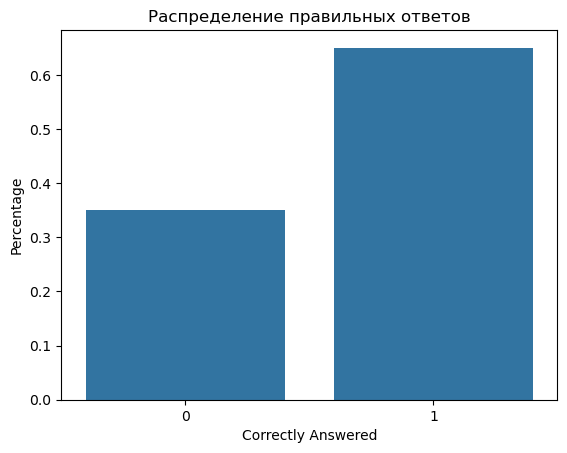

In [36]:
# Выделение из общего DataFrame, только вопросов
questions_all_data = all_data[all_data['content_type_id'] == 0]

correct_answer = questions_all_data['answered_correctly'].value_counts(normalize=True)

sns.barplot(x=correct_answer.index, y=correct_answer.values)
plt.xlabel('Correctly Answered')
plt.ylabel('Percentage')
plt.title('Распределение правильных ответов')
plt.show()

Построение распределения времени предыдущего вопроса

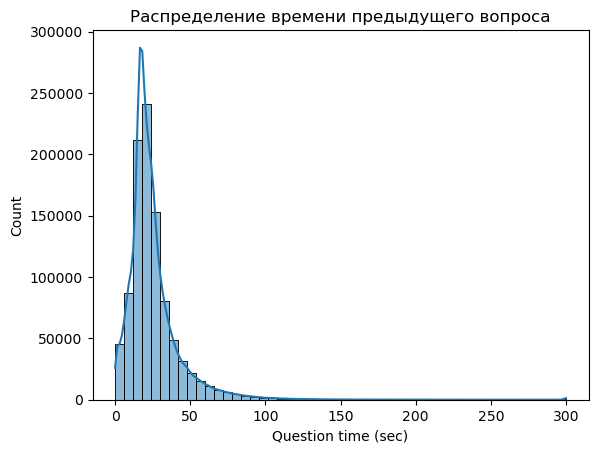

In [19]:
sns.histplot(
    questions_all_data['prior_question_elapsed_time'] / 1000,
    bins = 50,
    kde=True
)
plt.xlabel('Question time (sec)')
plt.title('Распределение времени предыдущего вопроса')
plt.show()

Построение влияния времени выполнения предыдущего вопроса на правильный ответ

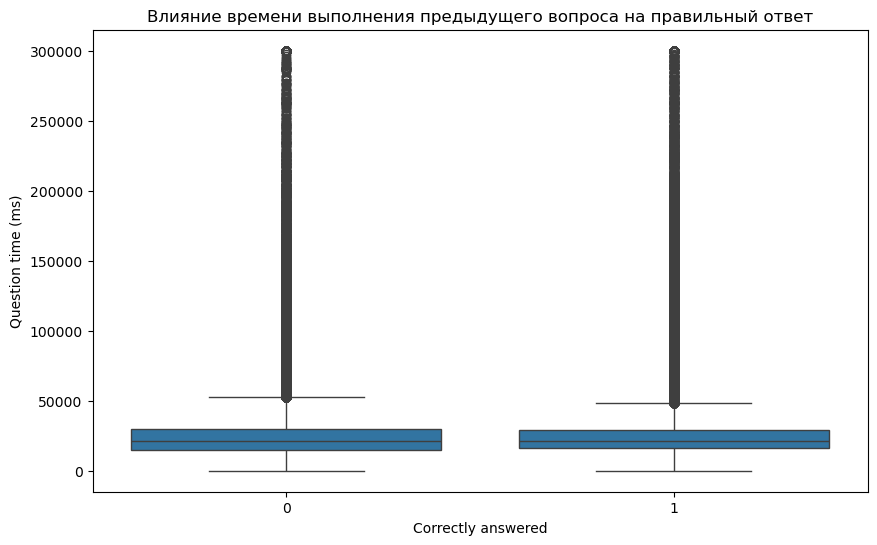

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='answered_correctly',
    y='prior_question_elapsed_time',
    data=questions_all_data
)
plt.xlabel('Correctly answered')
plt.ylabel('Question time (ms)')
plt.title('Влияние времени выполнения предыдущего вопроса на правильный ответ')
plt.show()

Построение влияния объяснений на правильность ответов

answered_correctly                     0         1
prior_question_had_explanation                    
False                           0.503093  0.496907
True                            0.334087  0.665913


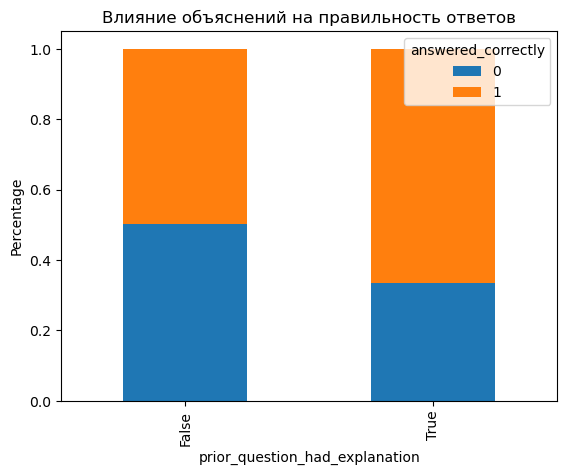

In [21]:
filter_data = questions_all_data.dropna(subset=['prior_question_had_explanation'])

explanation_correct = filter_data.groupby(['prior_question_had_explanation', 'answered_correctly']).size().unstack()

percent_explanation_correct = explanation_correct.div(explanation_correct.sum(axis=1), axis=0)
print(percent_explanation_correct)

percent_explanation_correct.plot(kind='bar', stacked=True)
plt.xlabel('prior_question_had_explanation')
plt.ylabel('Percentage')
plt.title('Влияние объяснений на правильность ответов')
plt.show()

Построение успеваемости по TOEIC

part
1    0.735834
2    0.707258
3    0.692096
4    0.620959
5    0.606321
6    0.650695
7    0.645141
Name: answered_correctly, dtype: float64


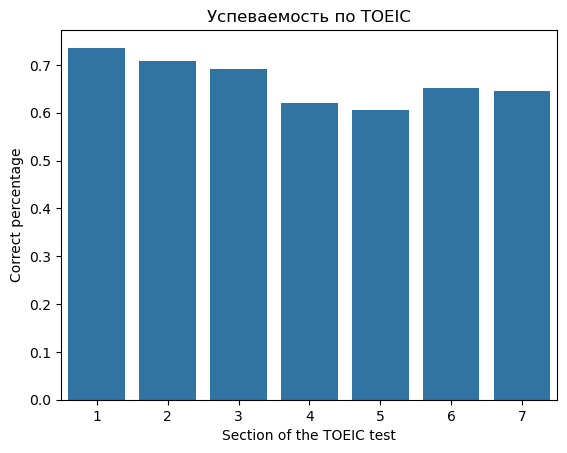

In [22]:
correct_part = questions_all_data.groupby('part')['answered_correctly'].mean()
print(correct_part)

sns.barplot(x=correct_part.index, y=correct_part.values)
plt.xlabel('Section of the TOEIC test')
plt.ylabel('Correct percentage')
plt.title('Успеваемость по TOEIC')
plt.show()

Построение успеваемости по тегам вопросов

C:\Users\Марат\AppData\Local\Temp\ipykernel_16548\743380309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_all_data['tags'] = questions_all_data['tags'].astype(str)
C:\Users\Марат\AppData\Local\Temp\ipykernel_16548\743380309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_all_data['tag_list'] = questions_all_data['tags'].str.split(' ')


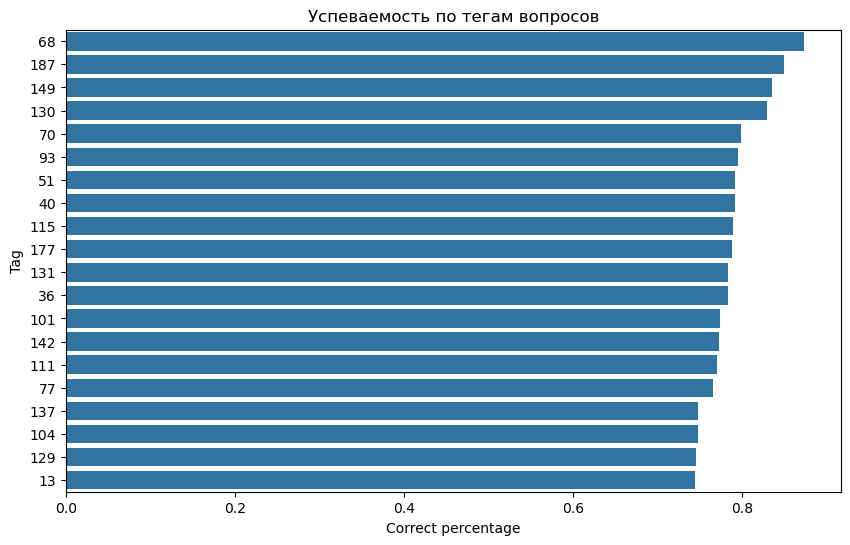

In [23]:
questions_all_data['tags'] = questions_all_data['tags'].astype(str)
questions_all_data['tag_list'] = questions_all_data['tags'].str.split(' ')

explode_tags = questions_all_data.explode('tag_list')

correct_tag = explode_tags.groupby('tag_list')['answered_correctly'].mean()

head_tags = correct_tag.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=head_tags.values, y=head_tags.index)
plt.xlabel('Correct percentage')
plt.ylabel('Tag')
plt.title('Успеваемость по тегам вопросов')
plt.show()

Создание DataFrame для построения зависимости успеваемости от активности пользователя

In [24]:
user_activity = train_data.groupby('user_id').size().reset_index(name='interaction_count')

correct_user = questions_all_data.groupby('user_id')['answered_correctly'].mean().reset_index(name='correct_rate')

user_analysis = pd.merge(user_activity, correct_user, on='user_id')
user_analysis.head()

,user_id,interaction_count,correct_rate
0,115,46,0.695652
1,124,30,0.233333
2,2746,20,0.578947
3,5382,128,0.672000
4,8623,112,0.642202


Построение графика зависимости успеваемости от активности пользователя

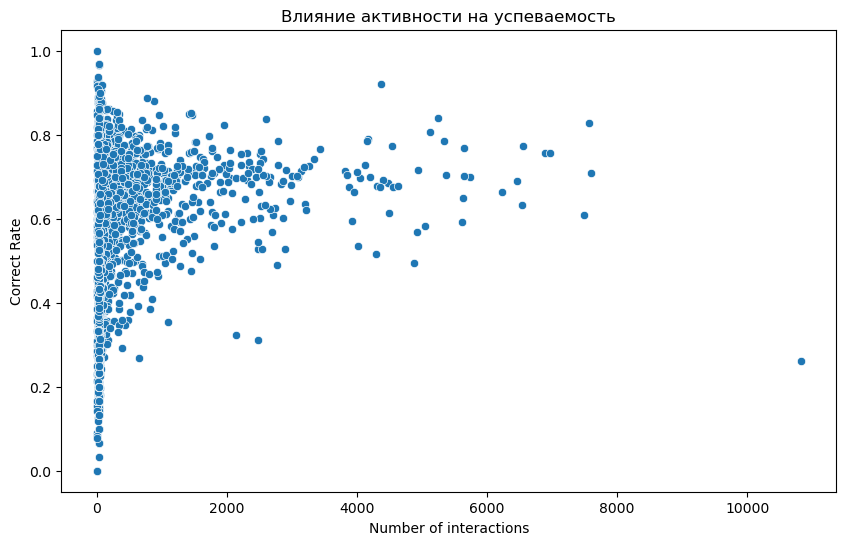

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='interaction_count', y='correct_rate', data=user_analysis)
plt.xlabel('Number of interactions')
plt.ylabel('Correct Rate')
plt.title('Влияние активности на успеваемость')
plt.show()

In [26]:
corr = user_analysis['interaction_count'].corr(user_analysis['correct_rate'])
print(f'Корреляция между активностью и успеваемостью: {round(corr, 2)}')

Корреляция между активностью и успеваемостью: 0.24


Построение графика зависимости успеваемости от времени cуток

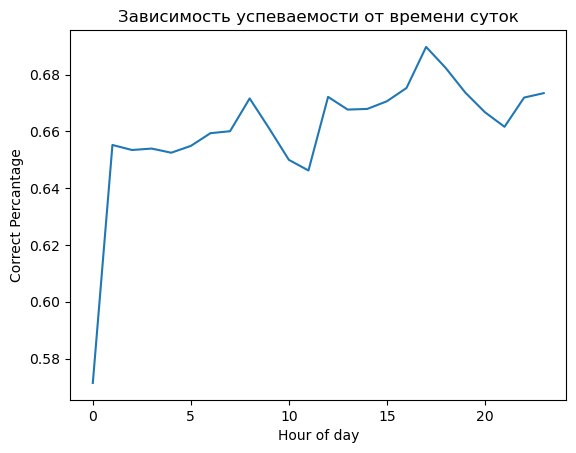

In [27]:
correct_hour = questions_all_data.groupby('hour')['answered_correctly'].mean()

sns.lineplot(x=correct_hour.index, y=correct_hour.values)
plt.xlabel('Hour of day')
plt.ylabel('Correct Percantage')
plt.title('Зависимость успеваемости от времени cуток')
plt.show()

In [37]:
#Определение типов данных
questions_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980093 entries, 0 to 980092
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   row_id                          980093 non-null  int64         
 1   timestamp                       980093 non-null  int64         
 2   user_id                         980093 non-null  int64         
 3   content_id                      980093 non-null  int64         
 4   content_type_id                 980093 non-null  int64         
 5   task_container_id               980093 non-null  int64         
 6   user_answer                     980093 non-null  int64         
 7   answered_correctly              980093 non-null  int64         
 8   prior_question_elapsed_time     980093 non-null  float64       
 9   prior_question_had_explanation  980093 non-null  bool          
 10  datetime                        980093 non-null  datetime64[n

Построение корреляционной матрицы

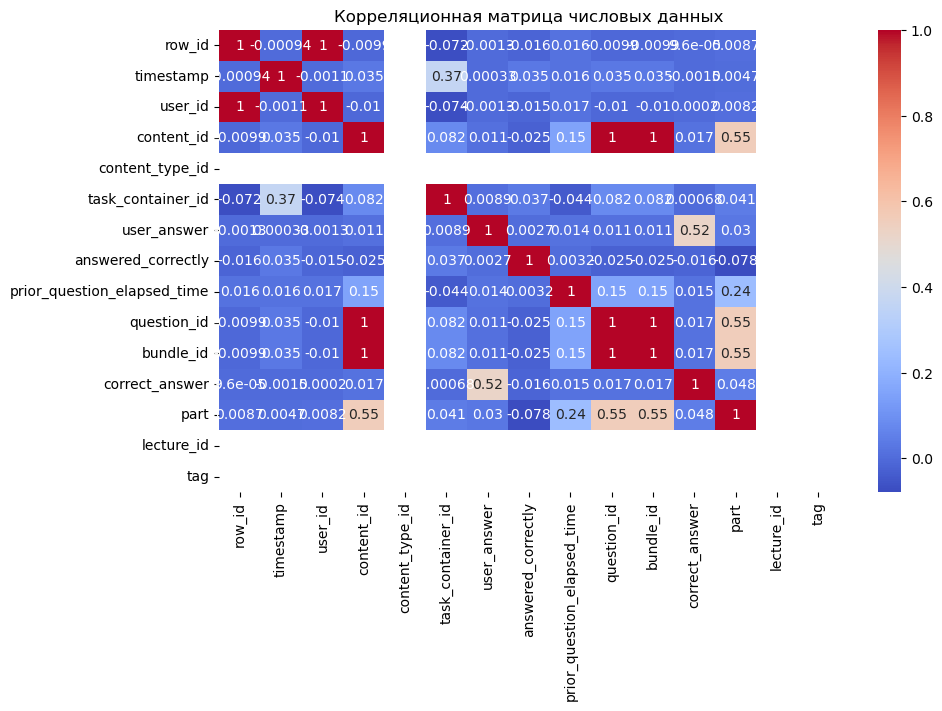

In [29]:
numeric = questions_all_data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = questions_all_data[numeric].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых данных')
plt.show()

In [30]:
user_perfomance = questions_all_data.groupby('user_id')['answered_correctly'].mean().reset_index()
print(user_perfomance.describe())

            user_id  answered_correctly
count  3.824000e+03         3824.000000
mean   1.050633e+07            0.545148
std    5.958653e+06            0.165519
min    1.150000e+02            0.000000
25%    5.363199e+06            0.433333
50%    1.061051e+07            0.571429
75%    1.565077e+07            0.666667
max    2.094902e+07            1.000000


In [31]:
part_perfomance = questions_all_data.groupby('part')['answered_correctly'].mean()
print(part_perfomance)

part
1    0.735834
2    0.707258
3    0.692096
4    0.620959
5    0.606321
6    0.650695
7    0.645141
Name: answered_correctly, dtype: float64


In [32]:
tag_perfomance = explode_tags.groupby('tag_list')['answered_correctly'].mean()
print(tag_perfomance.sort_values(ascending=False).head(10))

tag_list
68     0.873532
187    0.850349
149    0.836061
130    0.829202
70     0.799559
93     0.795796
51     0.792106
40     0.791627
115    0.789423
177    0.788602
Name: answered_correctly, dtype: float64


Построение графика времени выполнения предыдущего вопроса

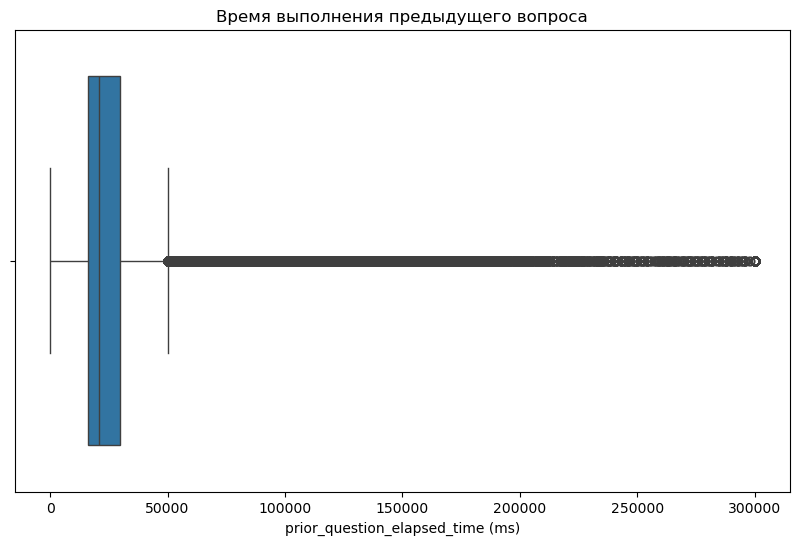

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x=questions_all_data['prior_question_elapsed_time'])
plt.xlabel('prior_question_elapsed_time (ms)')
plt.title('Время выполнения предыдущего вопроса')
plt.show()

Построение графика количества взаимодействий пользователя

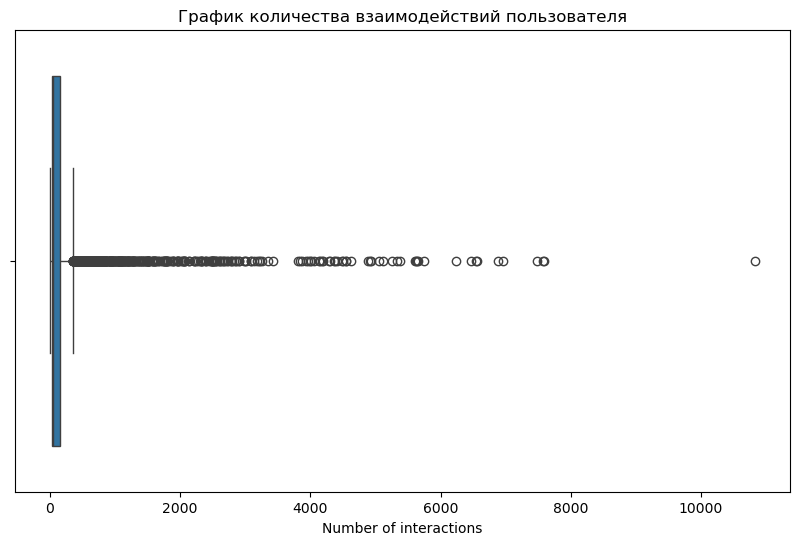

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=user_analysis['interaction_count'])
plt.xlabel('Number of interactions')
plt.title('График количества взаимодействий пользователя')
plt.show()